<a href="https://colab.research.google.com/github/bloomfieldfong/TextMining-ImageRecognition/blob/main/Hoja_de_Trabajo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hoja de Trabajo #4**

Michelle Bloomfield Fong,
Carné: 22000345

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import *
from keras.models import *
from keras.layers import *

In [4]:
#Getting data
dataset = pd.read_csv('/content/train.csv', error_bad_lines=False)
dataset.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **Spliting and separating the data**

In [5]:
#slipting data
train, test = train_test_split(dataset, test_size=0.30, random_state=42)

#separacion el label de los datos de entrenamiento
xtrain = np.array(train.iloc[:,1:])
labeltrain = np.array(train.iloc[:,0])

#separacion el label de los datos de test
xtest = np.array(test.iloc[:,1:])
labeltest = np.array(test.iloc[:,0])
print(labeltest.shape)

#28x28
xtrain = xtrain.reshape((xtrain.shape[0], 28, 28))
xtest = xtest.reshape((xtest.shape[0], 28, 28))

xtrain.shape
xtest.shape

(12600,)


(12600, 28, 28)

## **Visualizacion de datos**

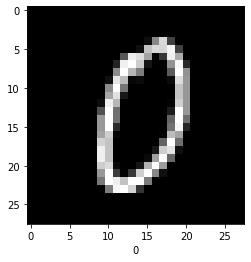

In [6]:
plt.imshow(xtrain[1], cmap='gray')
plt.xlabel(labeltrain[1])
plt.show()

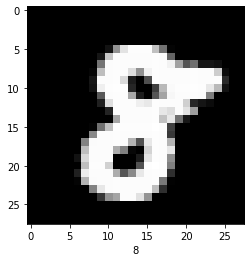

In [57]:
plt.imshow(xtrain[5], cmap='gray')
plt.xlabel(labeltrain[5])
plt.show()

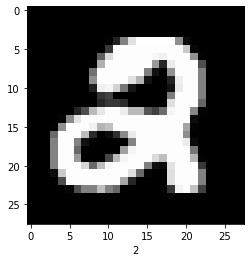

In [59]:
plt.imshow(xtrain[11], cmap='gray')
plt.xlabel(labeltrain[11])
plt.show()

## **RED NEURONAL**

In [7]:
xtrain = xtrain / 255
xtest = xtest / 255
xtrain = xtrain.reshape(xtrain.shape[0], 28, 28, 1)
xtest = xtest.reshape(xtest.shape[0], 28, 28, 1)


In [8]:
ann = Sequential()
#capa de entrada
ann.add(Flatten(input_shape=(28, 28, 1)))
#primera capa oculta
ann.add(Dense(units=1000, activation='relu', kernel_initializer='uniform'))
#segunda capa oculta
ann.add(Dense(units=500, activation='relu', kernel_initializer='uniform'))
#capa de salida
ann.add(Dense(units=10, activation='softmax'))

ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 10)                5010      
                                                                 
Total params: 1,290,510
Trainable params: 1,290,510
Non-trainable params: 0
_________________________________________________________________


## **Entrenamiento**

In [15]:
ann.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
ann_fit = ann.fit(xtrain, labeltrain, batch_size=128, epochs=5)

Epoch 1/5
230/230 [==============================] - 8s 34ms/step - loss: 0.0317 - accuracy: 0.9889
Epoch 2/5
230/230 [==============================] - 7s 30ms/step - loss: 0.0225 - accuracy: 0.9921
Epoch 3/5
230/230 [==============================] - 7s 29ms/step - loss: 0.0174 - accuracy: 0.9943
Epoch 4/5
230/230 [==============================] - 7s 30ms/step - loss: 0.0121 - accuracy: 0.9959
Epoch 5/5
230/230 [==============================] - 7s 30ms/step - loss: 0.0133 - accuracy: 0.9955


## **Accuracy del modelo**

In [21]:
evaluacion_ann = ann.evaluate(xtest, labeltest, verbose=0)
print("Accuracy: ", evaluacion_ann[1])

Accuracy:  0.9707936644554138


## **RED NEURONAL CNN**

In [14]:
cnn = Sequential()

cnn.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation="softmax"))

cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 800)               0         
                                                                 
 dense_7 (Dense)             (None, 128)              

In [18]:
cnn.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
cnn_fit = cnn.fit(xtrain, labeltrain, batch_size=128, epochs=5)

Epoch 1/5
230/230 [==============================] - 45s 191ms/step - loss: 0.3490 - accuracy: 0.8993
Epoch 2/5
230/230 [==============================] - 44s 191ms/step - loss: 0.0856 - accuracy: 0.9733
Epoch 3/5
230/230 [==============================] - 35s 153ms/step - loss: 0.0579 - accuracy: 0.9813
Epoch 4/5
230/230 [==============================] - 35s 151ms/step - loss: 0.0462 - accuracy: 0.9849
Epoch 5/5
230/230 [==============================] - 35s 153ms/step - loss: 0.0376 - accuracy: 0.9879


In [22]:
evaluacion_cnn = cnn.evaluate(xtest, labeltest, verbose=0)
print("Accuracy: ", evaluacion_cnn[1])

Accuracy:  0.9845238327980042


## **Comparación**

In [27]:
ann_fit.history

{'loss': [0.03168230876326561,
  0.022493872791528702,
  0.017421958968043327,
  0.012106997892260551,
  0.013347598724067211],
 'accuracy': [0.9889456033706665,
  0.9921428561210632,
  0.9942857027053833,
  0.995884358882904,
  0.9955441951751709]}

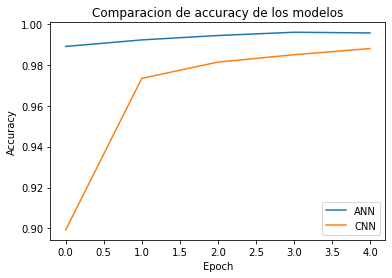

In [32]:
plt.plot(ann_fit.history['accuracy'], label='ANN')
plt.plot(cnn_fit.history['accuracy'], label='CNN')
plt.title('Comparacion de accuracy de los modelos')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

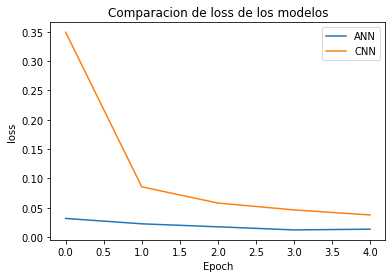

In [33]:
plt.plot(ann_fit.history['loss'], label='ANN')
plt.plot(cnn_fit.history['loss'], label='CNN')
plt.title('Comparacion de loss de los modelos')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [39]:
print("Accuracy para CNN: ", evaluacion_cnn[1])
print("Loss para CNN: ", evaluacion_cnn[0])
print("\n")
print("Accuracypara ANN: ", evaluacion_ann[1])
print("Loss para CNN: ", evaluacion_ann[0])


Accuracy para CNN:  0.9845238327980042
Loss para CNN:  0.05144079402089119


Accuracypara ANN:  0.9707936644554138
Loss para CNN:  0.13106182217597961


Ambas redes neuronales tienen un accuracy bastante similar pero podemos notar que el loss del modelo convulacional es mayor. Cualquiera de los dos modelos considero que son buenos.